In [1]:
!pip install numpy perceval-quandela qiskit

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import numpy as np
import perceval as pcvl

# Challenge 1 : Découverte de l'encodage par "rail"

![railway_meme.jpg](https://i.imgflip.com/8nfdum.jpg)

## Encoder des qubits ?
L'information quantique portée par un **qubit** peut être représentée de différentes manières. Nous utilisons ici le modèle d'ordinateur quantique photonique, c'est-à-dire, qui fonctionne avec **des photons** et **du matériel optique**. 

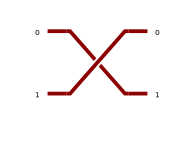

In [3]:
# Une magnifique porte 
x_gate = pcvl.PERM([1, 0])
pcvl.pdisplay(x_gate)

*Travailler avec des photons comporte beaucoup d'avantages, toutes les opérations sont possibles, avec des applications directes dans les télécommunications notamment, la mise à l'échelle est facilitée et la consommation est moindre.*

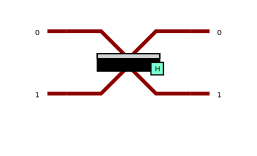

In [4]:
# Une autre magnifique porte
hadamard_gate = pcvl.BS.H()
pcvl.pdisplay(hadamard_gate)

Plusieurs façons d'encoder des qubits avec des photons existent, nous avons choisi de nous concentrer sur l'encodage en **double rail**, car elle est plus facile à appréhender.

In [5]:
qubits = {
    "0": pcvl.BasicState([1, 0]),
    "1": pcvl.BasicState([0, 1])
}
print("Le qbit 0 sur le premier rail :", qubits["0"])
print("Le qbit 1 sur le second rail :", qubits["1"])

Le qbit 0 sur le premier rail : |1,0>
Le qbit 1 sur le second rail : |0,1>


On peut alors effectuer des opérations sur ces rails pour simuler des **portes logiques**. Par exemple une porte *not* (`x_gate`) : 

In [6]:
# On crée une simulation de notre circuit : x_gate
p = pcvl.Processor("Naive", x_gate)

# On analyse la sortie produite avec un qubit 0 à l'entrée
analyser = pcvl.algorithm.Analyzer(p, [qubits["0"]], '*')
pcvl.pdisplay(analyser)

,"|0,1>","|1,0>"
"|1,0>",1,0


On peut aussi essayer avec **plusieurs entrées** :

In [7]:
# Dictionnaire (inverse de qubit défini au dessus) servant à afficher directement les qubits lorsqu'on
# utilise des fonctions comme l'ananlyseur. 
qubits_ = {qubits[k]: k for k in qubits}

# Le '*' dans la définition précédente d'analyser servait à afficher toutes les sorties possible, ici,
# j'ai précisé quelles sorties je voulais pour les avoir dans l'ordre que je souhaite. 
analyser = pcvl.algorithm.Analyzer(
    p, 
    input_states=list(qubits.values()), 
    output_states=list(qubits.values()), 
    mapping=qubits_
)
pcvl.pdisplay(analyser)

,0,1
0,0,1
1,1,0


Toutes les opérations peuvent se représenter par des **matrices unitaires**. Par exemples le circuit précédent peut se résumer par :

In [8]:
pcvl.pdisplay(x_gate.definition())

<IPython.core.display.Math object>

De manière générale : 
$$
|\phi\rangle = U|\psi\rangle
$$

Et ici : 
$$
|\phi\rangle = X|1\rangle = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix} \begin{pmatrix} 0 \\ 1 \end{pmatrix} = \begin{pmatrix} 1 \\ 0 \end{pmatrix} = |0\rangle
$$

La **concaténation de circuits** se traduit par une simple **multiplication matricielle** : 

In [9]:
super_circuit = x_gate // x_gate
pcvl.pdisplay(super_circuit.compute_unitary()) # On ne peut plus faire appel directement à .definition()

<IPython.core.display.Math object>

On peut essayer avec l'analyseur :

In [10]:
p = pcvl.Processor("Naive", super_circuit)
analyser = pcvl.algorithm.Analyzer(
    p, 
    input_states=list(qubits.values()), 
    output_states=list(qubits.values()), 
    mapping=qubits_
)
pcvl.pdisplay(analyser)

,0,1
0,1,0
1,0,1


Sans le mapping :

In [11]:
analyser = pcvl.algorithm.Analyzer(
    p, 
    input_states=list(qubits.values()), 
    output_states=list(qubits.values())
)
pcvl.pdisplay(analyser)

,"|1,0>","|0,1>"
"|1,0>",1,0
"|0,1>",0,1


Ou même observer notre magnifique super circuit qui ne *sert à rien* : 

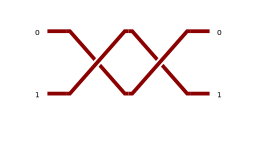

In [12]:
pcvl.pdisplay(super_circuit)

## Le début des problèmes...

C'est bien gentil les portes *not*, mais on ne va pas faire grand-chose avec. Que ce passe-t-il donc si on essaye avec une *autre* porte ? 

In [13]:
p = pcvl.Processor("Naive", hadamard_gate)
analyser = pcvl.algorithm.Analyzer(
    p, 
    input_states=[qubits["0"]], 
    output_states=list(qubits.values()), 
    mapping=qubits_
)
pcvl.pdisplay(analyser)

,0,1
0,1/2,1/2


Que c'est-il passé ? On a utilisé la superstar des portes quantiques : **la porte d'Hadamard**. C'est la *porte d'entrée* vers le monde de la quantique, elle permet de préparer un qbit dans un état **superposé**, ici : 


$$
H = \frac{1}{\sqrt{2}} \begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix}
$$

Si on ajoute un $0$ en entrée : 
$$
|\phi\rangle = H|0\rangle = \frac{1}{\sqrt{2}} \begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix} \begin{pmatrix} 1 \\ 0 \end{pmatrix} = \frac{1}{\sqrt{2}} \begin{pmatrix} 1 \\ 1 \end{pmatrix} 
$$

Avec : 
$$
\frac{1}{\sqrt{2}} \begin{pmatrix} 1 \\ 1 \end{pmatrix} = \frac{1}{\sqrt{2}} \begin{pmatrix} 1 \\ 0 \end{pmatrix} + \frac{1}{\sqrt{2}} \begin{pmatrix} 0 \\ 1 \end{pmatrix} = \frac{1}{\sqrt{2}} |0\rangle + \frac{1}{\sqrt{2}}|1\rangle
$$

*On peut créer une porte d'Hadamard avec une lame semi-réfléchissante !*

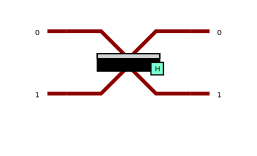

In [14]:
pcvl.pdisplay(hadamard_gate)

Vous l'avez peut-être remarqué, mais la sortie de l'analyseur n'est pas la même que celle des équations. En effet, $|\phi\rangle$ est un état quantique, qui peut être **complexe** : $|\phi\rangle = \frac{i}{\sqrt{2}} |0\rangle - \frac{i}{\sqrt{2}} |1\rangle$, alors que les probabilités d'observer un état plutôt qu'un autre sont bien réelles ! Pour passer aux probabilités, il suffit de **prendre le carré**. Par exemple pour l'exemple précédent : $\Pr(|0\rangle) = \left|\frac{1}{\sqrt{2}}\right|^2 = \frac{1}{2}$. Ce qui correspond bien à la sortie de notre analyseur. 

Pour obtenir les amplitudes complexes, on peut utiliser un *backend* : 

In [15]:
backend = pcvl.BackendFactory.get_backend("Naive")
backend.set_circuit(hadamard_gate)
backend.set_input_state(qubits["0"])
ampl0, ampl1 = backend.prob_amplitude(qubits["0"]), backend.prob_amplitude(qubits["1"])
print(f"|phi> = {ampl0} |0> + {ampl1} |1>")

|phi> = (0.7071067811865476+0j) |0> + (0.7071067811865475+0j) |1>


On retrouve bien le résultat des équations : 
$$
|\phi\rangle = \frac{1}{\sqrt{2}} |0\rangle + \frac{1}{\sqrt{2}}|1\rangle
$$



*Cette suite de challenge ne vise pas à entrer dans les détails théoriques, mais à découvrir l'écosystème des ordinateurs quantiques en pratiquant. Si vous souhaitez en apprendre plus, je vais essayer de mettre des ressources progressives dans chaque challenge. Voici déjà une belle introduction faite par Science Étonnante : https://youtu.be/bayTbt_8aNc*.

## Un nouveau challenger : le déphaseur

En plus d'avoir des amplitudes complexes, on peut les manipuler grâce à un outil très puissant : le **déphaseur**. Il s'applique à **un rail** et effectue l'opération : $e^{i\theta}$.

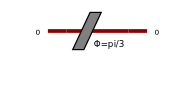

In [16]:
phase_shifter = pcvl.PS(np.pi/3)
pcvl.pdisplay(phase_shifter)

Dans un circuit cela donne : 

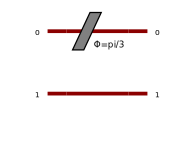

In [17]:
circuit_ps = pcvl.Circuit(2) // (0, phase_shifter)  # Le 0 correspond au numéro du rail où est positionné 
                                                    # notre composant 
pcvl.pdisplay(circuit_ps)

Avec sa **matrice unitaire** associée :

In [18]:
pcvl.pdisplay(circuit_ps.compute_unitary())

<IPython.core.display.Math object>

Il est aussi possible de regarder directement ce que donnent les **amplitudes** : 

In [19]:
backend_ps = pcvl.BackendFactory.get_backend("Naive")
backend_ps.set_circuit(circuit_ps)
backend_ps.set_input_state(qubits["0"])
ampl0, ampl1 = backend_ps.prob_amplitude(qubits["0"]), backend_ps.prob_amplitude(qubits["1"])
print(f"|phi> = {ampl0} |0> + {ampl1} |1>")

|phi> = (0.5000000000000001+0.8660254037844386j) |0> + 0j |1>


On peut s'amuser à reproduire des portes connues, comme la porte *not* :

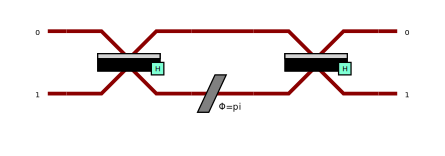

In [20]:
super_not = hadamard_gate // (1, pcvl.PS(np.pi)) // hadamard_gate
pcvl.pdisplay(super_not)

In [21]:
p = pcvl.Processor("Naive", super_not)
analyser = pcvl.algorithm.Analyzer(
    p, 
    input_states=list(qubits.values()), 
    output_states=list(qubits.values()), 
    mapping=qubits_
)
pcvl.pdisplay(analyser)

,0,1
0,0,1
1,1,0


*Que s'est-il passé ? Dans la base canonique $\left(|0\rangle = \begin{pmatrix} 1 \\ 0 \end{pmatrix}, |1\rangle = \begin{pmatrix} 0 \\ 1 \end{pmatrix}\right)$, appliquer un changement de phase sur l'un des deux rails n'aurait rien changé. Par contre, en passant dans une autre base :* 
$$
H|0\rangle = H \begin{pmatrix} 1 \\ 0 \end{pmatrix} = \frac{1}{\sqrt{2}} \begin{pmatrix} 1 \\ 1 \end{pmatrix} = |+\rangle 
$$

$$
H|1\rangle = H \begin{pmatrix} 0 \\ 1 \end{pmatrix} = \frac{1}{\sqrt{2}} \begin{pmatrix} 1 \\ -1 \end{pmatrix} = |-\rangle
$$

*On remarque que "0" et "1" diffèrent uniquement d'un changement de phase, ici un décalage de $e^{i\pi}$ sur le deuxième rail. Il suffit donc de passer dans la nouvelle base, déphaser le deuxième rail, et revenir dans la base canonique ($H$ est sa propre inverse, donc facile).*

## À vous de jouer ! 

Pour cette partie, nous allons utiliser la généralisation de la porte d'Hadamard : un *Beam Splitter*. Voici ses paramètres : 

In [22]:
# On peut définir des variables symboliques : 
symbolic_alpha = pcvl.P('α')
simple_bs = pcvl.BS(theta=symbolic_alpha)
pcvl.pdisplay(simple_bs.U)

<IPython.core.display.Math object>

In [23]:
# Puis leur assigner une valeur : 
simple_bs.assign({'α': np.pi/2})
pcvl.pdisplay(simple_bs.compute_unitary())

<IPython.core.display.Math object>

In [24]:
# Ou changer ensuite de valeur : 
symbolic_alpha.set_value(np.pi)
pcvl.pdisplay(simple_bs.compute_unitary())

<IPython.core.display.Math object>

### Étape 1

Considérant le circuit suivant (qui correspond à la définition du *Beam Splitter* d'au-dessus) : 

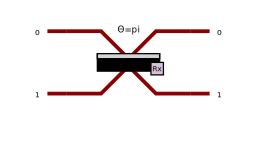

In [25]:
step_one = simple_bs
pcvl.pdisplay(step_one)

Et une valeur d'entrée : $|0\rangle$, 

Quelle valeur de $\alpha$ prendre pour avoir une probabilité de 0.9 d'avoir $|1\rangle$ ?

In [27]:
alpha = ...
raise NotImplementedError

NotImplementedError: 

In [ ]:
step_one.assign({'α': alpha})
pcvl.pdisplay(step_one)

In [ ]:
p_step_one = pcvl.Processor("Naive", step_one)
a_step_one = pcvl.algorithm.Analyzer(
    p_step_one, 
    input_states=[qubits["0"]], 
    output_states=list(qubits.values()),             
    mapping=qubits_
)

print("L'analyser doit renvoyer : 1/10 pour 0 et 9/10 pour 1")
pcvl.pdisplay(a_step_one)
# assert np.isclose(a_step_one.distribution[0][1].real, 0.9) 

### Étape 2

En considérant le circuit suivant, ainsi qu'une valeur d'entrée de $|0\rangle$, trouvez les valeurs de $\beta$ et $\gamma$ pour préparer un qbit dans l'état :
$$
|\psi\rangle = \frac{\sqrt{3}}{2} |0\rangle + \left(\frac{\sqrt{3}}{4} - \frac{i}{4} \right)|1\rangle 
$$

In [ ]:
symbolic_beta = pcvl.P("β")
symbolic_gamma = pcvl.P("γ")
step_two = pcvl.BS(theta=symbolic_beta) // (1, pcvl.PS(phi=symbolic_gamma))
pcvl.pdisplay(step_two)

In [ ]:
beta = ...
gamma = ...
raise NotImplementedError

In [ ]:
step_two.assign({"β": beta, "γ": gamma})

b_step_two = pcvl.BackendFactory.get_backend("Naive")
b_step_two.set_circuit(step_two)
b_step_two.set_input_state(qubits["0"])

ampl0, ampl1 = b_step_two.prob_amplitude(qubits["0"]), b_step_two.prob_amplitude(qubits["1"])

res = f"|φ> = {np.round(ampl0, 2)} |0> + {np.round(ampl1, 2)} |1>"
sol = f"|φ> = {np.round(np.sqrt(3) / 2 + 0j, 2)} |0> + {np.round(np.sqrt(3) / 4 - 1j / 4, 2)} |1>"

print(f"Résultat : {res}")
print(f"Solution : {sol}")

# On s'assure que la réponse est bien égale à la solution : 
# assert res == sol

### Un dernier outil pour la route : la sphère de Bloch 

Il se trouve que les deux résultats précédents peuvent être généralisés. Avec le circuit suivant, il est possible de préparer **n'importe quel état.** *(https://perceval.quandela.net/docs/components.html#beam-splitter)*

In [ ]:
super_preparator = pcvl.BS()
pcvl.pdisplay(super_preparator)

La définition est en fait bien plus générale que ce qu'on a utilisé précédemment : 

In [ ]:
pcvl.pdisplay(super_preparator.definition())

Par exemple, avec des valeurs aléatoires : 

In [ ]:
import random
phi_tl, phi_tr, phi_bl, phi_br, theta_ = [round(random.uniform(0, np.pi), 2) for _ in range(5)]
super_preparator = pcvl.BS(phi_tl=phi_tl, phi_tr=phi_tr, phi_bl=phi_bl, phi_br=phi_br, theta=theta_)
pcvl.pdisplay(super_preparator.U)

Ce qui nous permet de préparer : 

In [ ]:
backend = pcvl.BackendFactory.get_backend("Naive")
backend.set_circuit(super_preparator)
backend.set_input_state(qubits["0"])

ampl0, ampl1 = backend.prob_amplitude(qubits["0"]), backend.prob_amplitude(qubits["1"])

print(f"|φ> = {np.round(ampl0, 2)} |0> + {np.round(ampl1, 2)} |1>")

Pour représenter un qubit, il est possible d'utiliser la **sphère de Bloch**. 

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/6b/Bloch_sphere.svg/800px-Bloch_sphere.svg.png" alt="bloch_sphere_wikipedia.png" width="200" height="200">

L'axe $Z$ correspond aux états $|0\rangle$ et $|1\rangle$, l'axe $X$ correspond aux états $|+\rangle$ et $|-\rangle$ rencontrés précédemment, et l'axe $Y$ correspond aux états $|i\rangle$ et $|-i\rangle$. 

On peut facilement visualiser un état avec la librairie Qiskit :

In [ ]:
from qiskit.visualization import plot_bloch_multivector
from qiskit.quantum_info import Statevector

state_vector = Statevector([ampl0, ampl1])  # À ne pas confondre avec StateVector de Perceval
plot_bloch_multivector(state_vector)

Un simple $|0\rangle$ : 

In [ ]:
plot_bloch_multivector(np.array(qubits["0"]))  # Même chose que plot_bloch_multivector([1, 0])

Petit utilitaire pour la suite : 

In [ ]:
def circuit_to_state_vector(circuit):
    backend = pcvl.BackendFactory.get_backend("Naive")
    backend.set_circuit(circuit)
    backend.set_input_state(qubits["0"])
    ampl0, ampl1 = backend.prob_amplitude(qubits["0"]), backend.prob_amplitude(qubits["1"])
    return Statevector([ampl0, ampl1])
plot_bloch = lambda circuit: plot_bloch_multivector(circuit_to_state_vector(circuit))

Notre état $|+\rangle$, fabriqué en appliquant une porte d'Hadamard sur $|0\rangle$ $\left(|+\rangle = H|0\rangle\right)$ :

In [ ]:
plot_bloch(hadamard_gate)

Étant donné que la mesure est une projection, dans notre cas, sur la base $\left\{|0\rangle, |1\rangle\right\}$, il est plus facile de voir avec cette représentation que l'état $|+\rangle$, quand il est mesuré, a autant de chance de donner $0$ que de donner $1$. Il est aussi simple de voir que la phase globale (une rotation sur l'axe $Z$), n'aura pas d'influence sur la mesure. Cela se retrouve par le calcul, pour $|\psi\rangle = e^{i\theta} \alpha |0\rangle + e^{i\theta} \beta |1\rangle$ : 
$$
\Pr(0) = \left|e^{i\theta}\alpha\right|^2 = |\alpha|^2
$$
$$
\Pr(1) = \left|e^{i\theta}\beta\right|^2 = |\beta|^2
$$

Par ailleurs, on peut aussi comprendre pourquoi la porte *not* s'appelle une porte $X$ : Une rotation de $\pi$ autour de l'axe $X$, fait passer l'état $|0\rangle$ à l'état $|1\rangle$, et inversement. 

### Étape finale

De nouveau, quelques fonctions utilitaires. Comme leurs noms l'indiquent, ces fonctions permettent d'effectuer des rotations selon les différents axes avec un angle choisi. Pour les combiner, il suffit d'utiliser l'opérateur //. 

*(PS : Rappelez vous de la règle de la main :)*

In [ ]:
x_rot = lambda x: pcvl.Circuit(2) // (0, pcvl.PS(np.pi)) // pcvl.BS.Rx(theta=x) // (0, pcvl.PS(np.pi)) 
y_rot = lambda x: pcvl.BS.Ry(theta=x)
z_rot = lambda x: pcvl.BS.H() // x_rot(x) // pcvl.BS.H() 

Se déplacer sur la sphère devient alors trivial !

In [ ]:
# (Tous les chemins partent de |0> avec les fontions que j'ai écrites)
the_way = x_rot(-np.pi/4) // z_rot(-np.pi/4)
plot_bloch(the_way)

In [ ]:
pcvl.pdisplay(the_way)

Effectuez le chemin suivant : 

Point de départ : 
$$
|\phi_{start}\rangle = \frac{\sqrt{2+\sqrt{2}}}{2} |0\rangle + \frac{\sqrt{2-\sqrt{2}}}{2} e^{-i\frac{\pi}{4}} |1\rangle
$$

Étape : 
$$
|\phi_{step}\rangle = |-\rangle
$$

Point d'arrivée : 
$$
|\phi_{finish}\rangle = \frac{\sqrt{2-\sqrt{2}}}{2} |0\rangle + \frac{\sqrt{2+\sqrt{2}}}{2} e^{i\frac{\pi}{4}} |1\rangle
$$

Coordonnées du point de départ : 

In [ ]:
start_state = np.array([np.sqrt(2+np.sqrt(2))/2, np.sqrt(2-np.sqrt(2))/2 * (np.sqrt(2)/2 - 1j * np.sqrt(2)/2)])
plot_bloch_multivector(start_state)

Coordonnées de l'étape : 

In [ ]:
step_state = np.array([np.sqrt(2)/2, -np.sqrt(2)/2])
plot_bloch_multivector(step_state)

Coordonnées de l'arrivée : 

In [ ]:
finish_state = np.array([np.sqrt(2-np.sqrt(2))/2, np.sqrt(2+np.sqrt(2))/2 * (np.sqrt(2)/2 + 1j * np.sqrt(2)/2)])
plot_bloch_multivector(finish_state)

In [ ]:
start = y_rot(np.pi/4) // z_rot(-np.pi/4)  # Pour se placer sur le départ

delta = ...
epsilon = ...
zeta = ...
eta = ... 
raise NotImplementedError

# Une autre façon d'enchaîner les portes 
final_step = (start
                .add(0, z_rot(delta))
                .add(0, y_rot(epsilon))  # Arrivé à l'étape Hadamard
                .add(0, y_rot(zeta))
                .add(0, z_rot(eta))  # Fin du parcours !
             )
plot_bloch(final_step)

## Avez-vous remarqué ? 
***Ceci est un point physique non important pour la validation du challenge, je le mentionne juste pour ceux qui se posent la question***.

Les amplitudes de `start` et de `start_state` ne sont pas les mêmes !

En effet, il s'agit là d'un point que je n'ai pas abordé : les **phases globales** et les **phases relatives**. Une phase globale est une phase du type $e^{i\theta}|\phi\rangle$, elle ne change rien dans nos calculs, car elle ne permet pas de différencier $|0\rangle$ de $|1\rangle$. Elle **n'est pas visible sur la sphère de Bloch, mais l'est en calculant les amplitudes**

Par contre, la phase relative, une phase de type $|\psi\rangle = \alpha|0\rangle +\beta e^{i\theta}|1\rangle$, pourra avoir un impact en fonction des calculs suivants (*voir par exemple la technique du **retour de phase**, central dans l'algorithme de Shor)*. Elle **est visible sur la sphère de Bloch et en calculant les amplitudes**. 

Du coup, quand j'ai défini : 
```python
start_state = np.array([np.sqrt(2+np.sqrt(2))/2, np.sqrt(2-np.sqrt(2))/2 * (np.sqrt(2)/2 - 1j * np.sqrt(2)/2)])
``` 
Les amplitudes sont : $0.92|0\rangle + (0.27 - 0.27i)|1\rangle$. Soit : 
$$
|\phi_{start}\rangle = \frac{\sqrt{2+\sqrt{2}}}{2} |0\rangle + \frac{\sqrt{2-\sqrt{2}}}{2} e^{-i\frac{\pi}{4}} |1\rangle
$$

Alors que quand j'ai défini : 
```python 
start = y_rot(np.pi/4) // z_rot(-np.pi/4) 
```
Les amplitudes sont : $(-0.35+0.15i)|0\rangle+ (-0.85-0.35i)|1\rangle$. Soit : 
$$
|\phi_{start}'\rangle = \frac{\sqrt{2+\sqrt{2}}}{2} e^{i\frac{\pi}{8}} |0\rangle + \frac{\sqrt{2-\sqrt{2}}}{2} e^{-i\frac{\pi}{8}} |1\rangle
$$

On remarque que $|\phi_{start}\rangle$ et $|\phi_{start}'\rangle$ ne diffèrent que d'une phase globale : 

$$
|\phi_{start}'\rangle = e^{i\frac{\pi}{8}} |\phi_{start}\rangle
$$


Dans mon exemple de `super_not` plus haut, j'ai utilisé une phase relative, tandis que lorsque j'ai expliqué les rotations $X$ et $Z$ juste avant l'étape finale, je parlais de phase globale ! 

## Récupération du drapeau 

Lancez la cellule ci-dessous en indiquant l'*URL* donné dans l'énoncé. Les tests effectués sont les mêmes que dans ce *notebook*, mais il peut y avoir des problèmes si vous avez lancé les cellules plusieurs fois. **N'hésitez pas à relancer tout le *notebook* d'un coup.** 

In [ ]:
import requests as rq

def circuit_to_list(circuit):
    return [[(x.real, x.imag) for x in l] for l in np.array(circuit.compute_unitary())]
    
d = {
    "step_one": circuit_to_list(step_one),
    "step_two": circuit_to_list(step_two),
    "final_step": circuit_to_list(final_step)
}

URL = "https://perceval.challenges.404ctf.fr"
rq.get(URL + "/healthcheck").json()

In [ ]:
rq.post(URL + "/challenges/1", json=d).json()